# ASSIGNMENT 2 : Citibike Analysis

### *Statement:  Complete an analysis of Citibike using the "citibike.csv" dataset. Your analysis should include summary statistics (mean, median, variance, standard deviation, range, quartiles). For details on Citibike system data go here: https://www.citibikenyc.com/system-data*

## Analytics Questions:
#### 1. Compute summary statistics for tripduration
#### 2. Compute summary statistics for age
#### 3. Compute summary statistics for tripduration in minutes (Need to transform tripduration from seconds to minutes)
#### 4. Compute the correlation between age and tripduration


#### 1. Compute summary statistics for tripduration
*Solution 1*

STEP 1: Data Understanding and Exploration

In [1]:
Main.df = read.csv("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\Citibike_Data.csv")

In [2]:
head(Main.df,3)
tail(Main.df,3)

tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender
364,9/1/2017 0:02,9/1/2017 0:08,3183,Exchange Place,40.71625,-74.03346,3276,Marin Light Rail,40.71458,-74.04282,29670,Subscriber,1989,1
357,9/1/2017 0:08,9/1/2017 0:14,3187,Warren St,40.72112,-74.03805,3199,Newport Pkwy,40.72874,-74.03211,26163,Subscriber,1980,1
432,9/1/2017 0:10,9/1/2017 0:17,3195,Sip Ave,40.73074,-74.06378,3280,Astor Place,40.71928,-74.07126,26273,Subscriber,1988,1


,tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender
33117,171,9/30/2017 23:41,9/30/2017 23:44,3210,Pershing Field,40.74268,-74.05179,3207,Oakland Ave,40.7376,-74.05248,31946,Subscriber,1993,1
33118,288,9/30/2017 23:47,9/30/2017 23:52,3186,Grove St PATH,40.71959,-74.04312,3203,Hamilton Park,40.7276,-74.04425,26248,Subscriber,1973,1
33119,297,9/30/2017 23:47,9/30/2017 23:52,3186,Grove St PATH,40.71959,-74.04312,3203,Hamilton Park,40.7276,-74.04425,26282,Subscriber,1975,1


In [3]:
summary(Main.df)

  tripduration                 starttime                stoptime    
 Min.   :     61.0   9/12/2017 8:37 :   10   9/12/2017 7:57 :   10  
 1st Qu.:    238.0   9/22/2017 17:44:   10   9/21/2017 18:56:    9  
 Median :    355.0   9/25/2017 8:17 :   10   9/21/2017 8:07 :    9  
 Mean   :    756.9   9/15/2017 8:43 :    9   9/7/2017 18:30 :    9  
 3rd Qu.:    610.0   9/21/2017 8:10 :    9   9/13/2017 7:35 :    8  
 Max.   :2181628.0   9/22/2017 8:09 :    9   9/16/2017 12:32:    8  
                     (Other)        :33062   (Other)        :33066  
 start.station.id      start.station.name start.station.latitude
 Min.   :3183     Grove St PATH : 4079    Min.   :40.69         
 1st Qu.:3187     Hamilton Park : 2415    1st Qu.:40.72         
 Median :3203     Exchange Place: 2146    Median :40.72         
 Mean   :3217     Sip Ave       : 1672    Mean   :40.72         
 3rd Qu.:3225     Newport PATH  : 1487    3rd Qu.:40.73         
 Max.   :3481     Morris Canal  : 1402    Max.   :40.75   

In [4]:
str(Main.df)

'data.frame':	33119 obs. of  15 variables:
 $ tripduration           : int  364 357 432 934 932 414 625 178 557 220 ...
 $ starttime              : Factor w/ 18452 levels "9/1/2017 0:02",..: 1 2 3 3 3 4 4 5 6 7 ...
 $ stoptime               : Factor w/ 18578 levels "10/1/2017 1:33",..: 2 3 4 6 6 5 6 7 9 8 ...
 $ start.station.id       : int  3183 3187 3195 3272 3272 3186 3194 3183 3183 3187 ...
 $ start.station.name     : Factor w/ 49 levels "5 Corners Library",..: 17 47 44 24 24 19 32 17 17 47 ...
 $ start.station.latitude : num  40.7 40.7 40.7 40.7 40.7 ...
 $ start.station.longitude: num  -74 -74 -74.1 -74 -74 ...
 $ end.station.id         : int  3276 3199 3280 3207 3207 3480 3194 3214 3199 3270 ...
 $ end.station.name       : Factor w/ 69 levels "12 Ave & W 40 St",..: 41 50 5 52 52 68 42 21 50 33 ...
 $ end.station.latitude   : num  40.7 40.7 40.7 40.7 40.7 ...
 $ end.station.longitude  : num  -74 -74 -74.1 -74.1 -74.1 ...
 $ bikeid                 : int  29670 26163 26273 26297 29

#### Looks like dates are taken as factors. Lets convert it to date data type for calculation further.
#### Also gender is  an integer. Since we dont have information on which number represents what gender, we will let it be the way it is.

In [5]:
class(Main.df$stoptime)

[1] "factor"

In [6]:
# COnverting Date factor to Date type for caluclation.
Main.df$starttime= as.POSIXct(Main.df$starttime,format="%m/%d/%Y %H:%M",tz=Sys.timezone())
Main.df$stoptime= as.POSIXct(Main.df$stoptime,format="%m/%d/%Y %H:%M",tz=Sys.timezone())

In [7]:
Main.df$Diff = Main.df$stoptime - Main.df$starttime

#Let us convert the tripduration given in secs to Minutes for more convenience.
Main.df$tripduration = Main.df$tripduration/60

In [8]:
summary(Main.df$tripduration)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.02     3.97     5.92    12.62    10.17 36360.47 

In [9]:
head(Main.df[,c('tripduration','Diff')])

tripduration,Diff
6.066667,6 mins
5.950000,6 mins
7.200000,7 mins
15.566667,15 mins
15.533333,15 mins
6.900000,7 mins


#### Apprently Start and stop time does not calculate the trip duration accurately. We will use tripduration for the calculation further.

### Lets analyse the trip duration for more insights.


In [10]:
cat("The mean Trip duration for the Citibike is:", mean(Main.df[,"tripduration"]))
summary(Main.df[,"tripduration"])

The mean Trip duration for the Citibike is: 12.61503

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.02     3.97     5.92    12.62    10.17 36360.47 

In [11]:
Main.df[Main.df$tripduration > 36000|Main.df$tripduration == min(Main.df$tripduration),]

,tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender,Diff
1188,36360.466667,2017-09-02 08:44:00,2017-09-27 14:44:00,3202,Newport PATH,40.72722,-74.03376,3217,Bayside Park,40.69865,-74.08208,29542,Customer,NULL,0,36360 mins
4045,1.016667,2017-09-05 18:09:00,2017-09-05 18:10:00,3185,City Hall,40.71773,-74.04385,3186,Grove St PATH,40.71959,-74.04312,29642,Subscriber,1957,1,1 mins
10233,1.016667,2017-09-11 09:51:00,2017-09-11 09:52:00,3267,Morris Canal,40.71242,-74.03853,3214,Essex Light Rail,40.71277,-74.03649,29290,Subscriber,1988,1,1 mins
11884,1.016667,2017-09-12 17:05:00,2017-09-12 17:06:00,3184,Paulus Hook,40.71415,-74.03355,3183,Exchange Place,40.71625,-74.03346,29203,Subscriber,1989,1,1 mins
16845,1.016667,2017-09-16 15:12:00,2017-09-16 15:13:00,3220,5 Corners Library,40.73496,-74.05950,3220,5 Corners Library,40.73496,-74.05950,29247,Subscriber,1985,1,1 mins
19787,1.016667,2017-09-19 08:19:00,2017-09-19 08:20:00,3272,Jersey & 3rd,40.72333,-74.04595,3211,Newark Ave,40.72153,-74.04630,29279,Subscriber,1988,1,1 mins
23177,1.016667,2017-09-21 20:12:00,2017-09-21 20:13:00,3211,Newark Ave,40.72153,-74.04630,3272,Jersey & 3rd,40.72333,-74.04595,26302,Subscriber,1972,1,1 mins
23974,1.016667,2017-09-22 14:02:00,2017-09-22 14:03:00,3202,Newport PATH,40.72722,-74.03376,3202,Newport PATH,40.72722,-74.03376,29575,Subscriber,1992,1,1 mins
29153,1.016667,2017-09-27 12:18:00,2017-09-27 12:19:00,3272,Jersey & 3rd,40.72333,-74.04595,3270,Jersey & 6th St,40.72529,-74.04557,26201,Subscriber,1991,2,1 mins


#### Insights:

1) It is strange to see Maximum citibike duration being 36360.47 Minutes. Which is a little more than 25 days. Someone really loves to bike a lot.Even more strange since the distance between start and end stop is just 4.7 miles

2) It is also odd to see some of the shortest Trip duration with Start and End station being much far away than the time it shows it covered in.

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


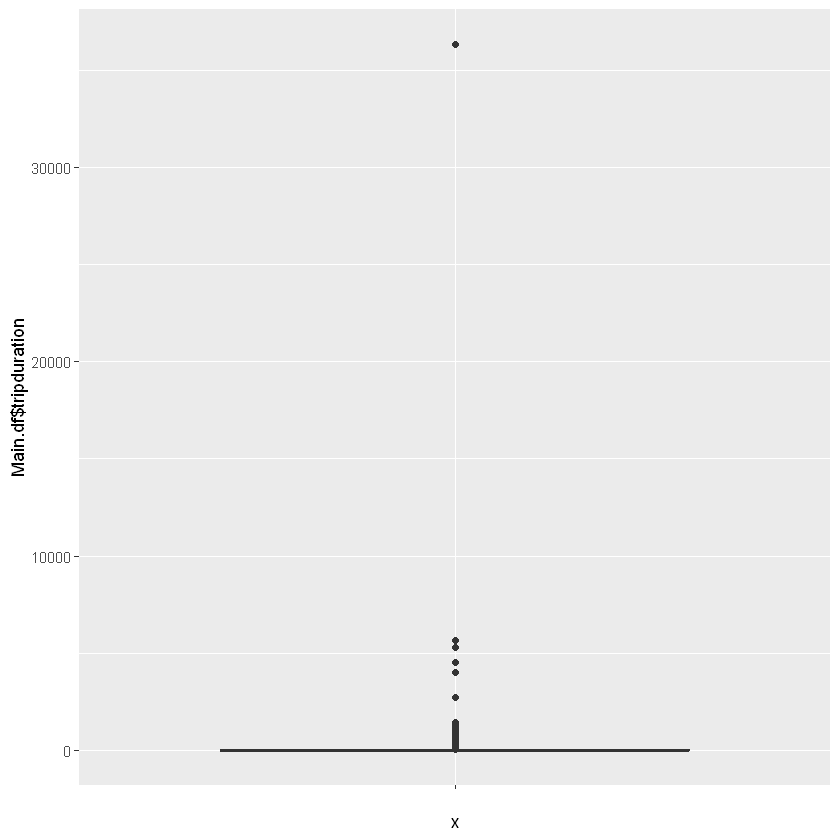

In [12]:
library(ggplot2)
ggplot(data = Main.df, aes(x = "", y = Main.df$tripduration)) + 
  geom_boxplot() +
  coord_cartesian(ylim = c(0, max(Main.df[,"tripduration"])))

#### The above graph doesnt really show much insights with the outliers sitting far from the mean.

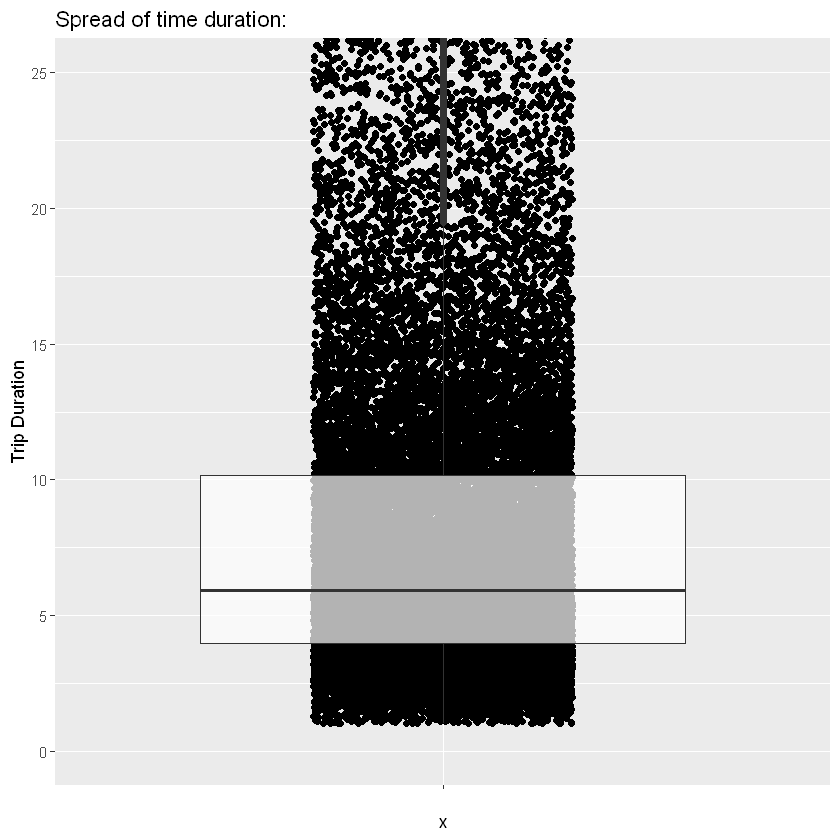

In [13]:

ggplot(data = Main.df, aes(x = "", y = Main.df$tripduration)) + 
 geom_jitter(shape=16, position=position_jitter(0.2))+
  geom_boxplot(alpha = 0.7) +
  coord_cartesian(ylim = c(0, 25))+
  ylab("Trip Duration")+
  ggtitle("Spread of time duration:")
 

### The above Boxplot shows the spread of timeduration the citibikes were used 

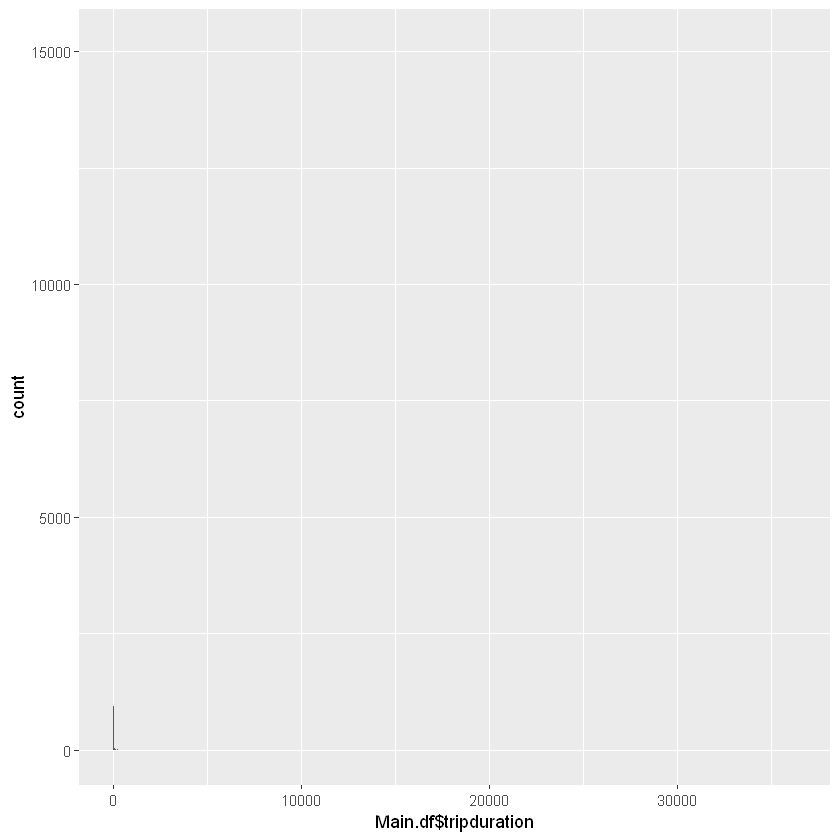

In [14]:
graph = ggplot(data = Main.df) 
graph + geom_histogram(binwidth = 10,aes(x = Main.df$tripduration)) 

#####  It is impossible to understand anything out of the above histogram. This is again due to the outliers.
#### Lets try to visualise with y and x limits:

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."Warning message:
"Removed 9 rows containing missing values (geom_bar)."

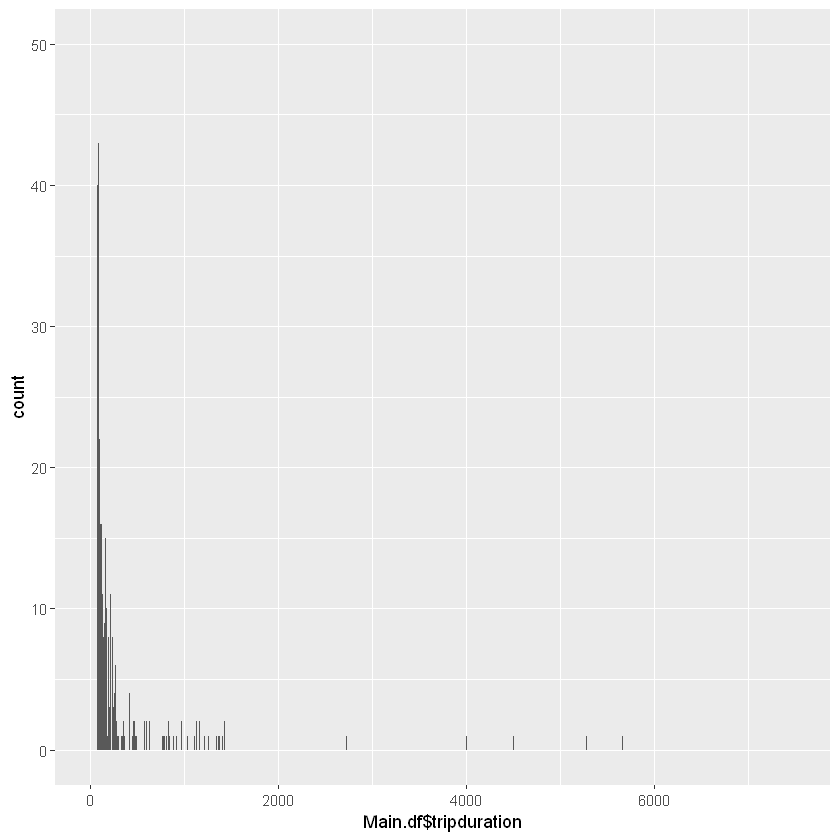

In [15]:
graph + geom_histogram(binwidth = 10,aes(x = Main.df$tripduration)) + ylim(0,50) + xlim(0,7500)

*The above graph makes much more sense. Appears like most of the Tripduration lies under 2000 mins and some outliers have extreme values.* 

### 2. Compute summary statistics for age

##### *Solution 2:*

In [16]:
#calculate age from the given birth year
Main.df$Age <-2019 - as.numeric(as.character(Main.df[,"birth.year"])) 

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

In [17]:
summary(Main.df$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  18.00   32.00   36.00   38.88   44.00  132.00    2384 

Warning message:
"Removed 2384 rows containing missing values (geom_path)."

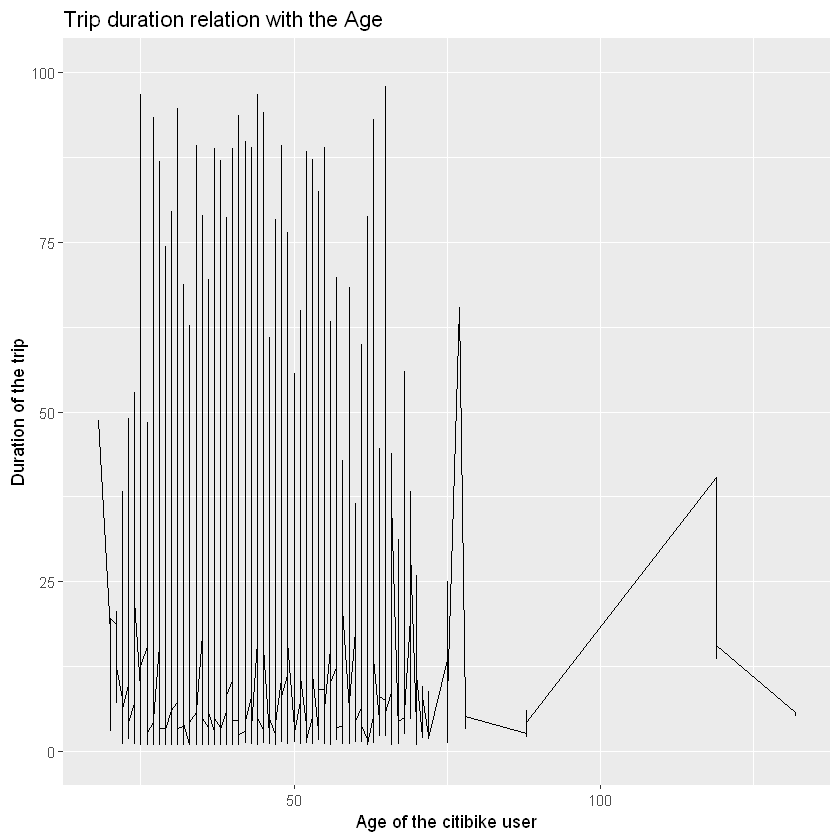

In [18]:
ggplot(data = Main.df, aes(x=Main.df$Age, y = Main.df$tripduration)) + geom_line() + ylim(0,100) + 
xlab("Age of the citibike user") +
ylab("Duration of the trip") + 
ggtitle("Trip duration relation with the Age")

Warning message:
"Removed 2442 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 2442 rows containing missing values (geom_point)."

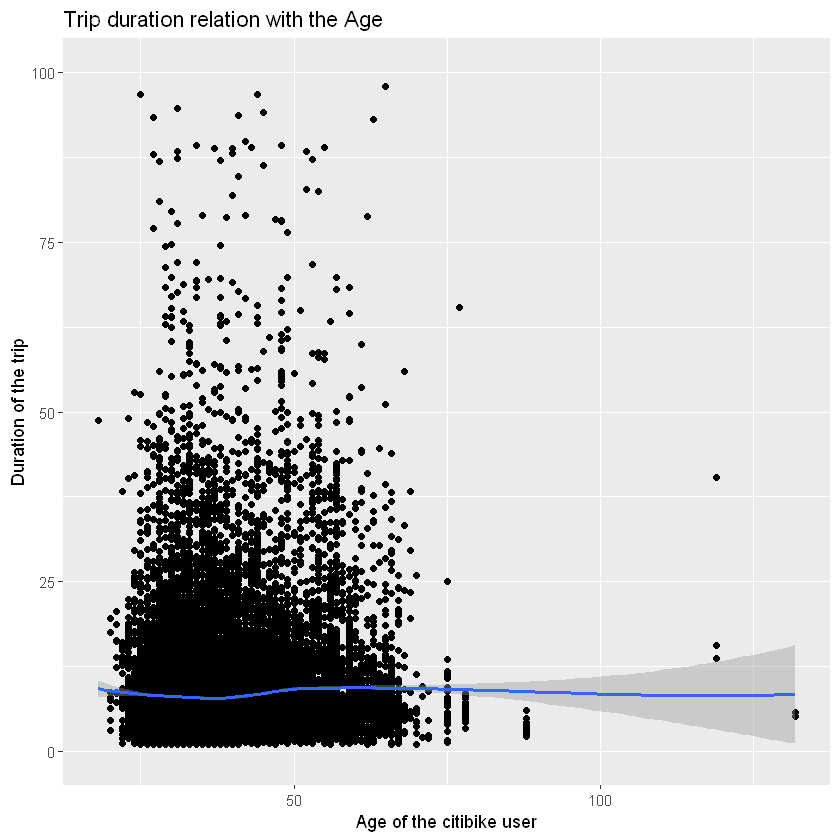

In [19]:
ggplot(data = Main.df, aes(x=Main.df$Age, y = Main.df$tripduration)) + geom_point() + ylim(0,100) + 
xlab("Age of the citibike user") +
ylab("Duration of the trip") + 
ggtitle("Trip duration relation with the Age") +
geom_smooth(method="loess")

#### From the above graphs it is clear that most of the Citibike users sit between 0 to 75 years of age



### 3. Compute summary statistics for tripduration in minutes (Need to transform tripduration from seconds to minutes)
#### *Solution 3:*

In [20]:
summary(Main.df$tripduration)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1.02     3.97     5.92    12.62    10.17 36360.47 

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

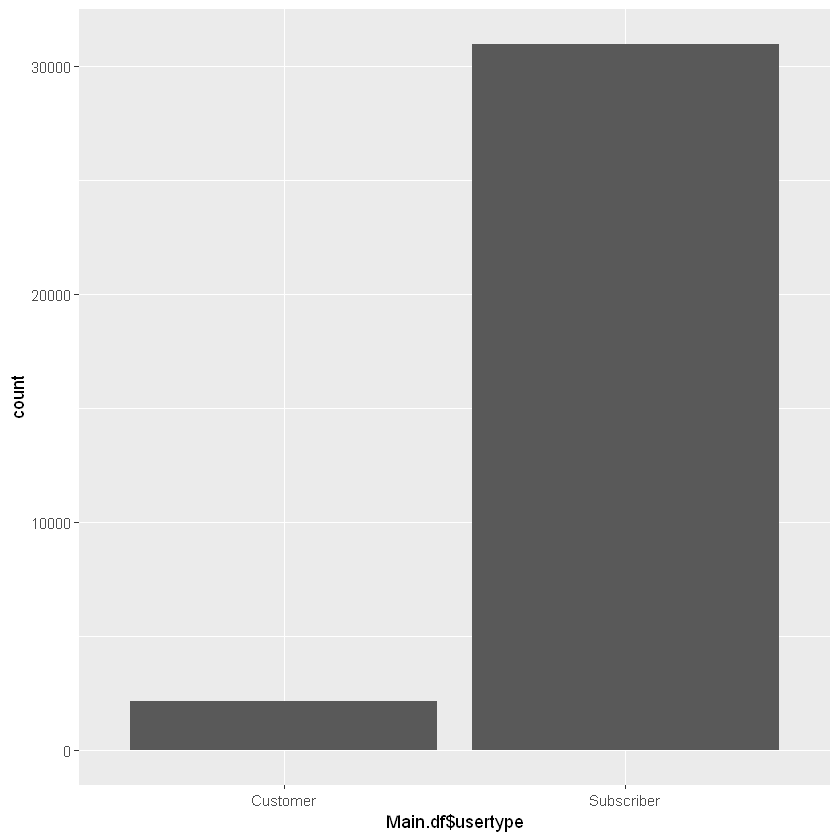

In [21]:
ggplot(data = Main.df, aes(x = Main.df$usertype)) + 
geom_histogram(binwidth = 10,stat = "count", aes(color = Main.df$gender))


#### Looks like count of Subscribers is much higher than one time Customers 

### 4. Compute the correlation between age and tripduration
#### *Solution 4:*

In [22]:
cat("The correlation between Age and Tripduration is :",cor(Main.df$tripduration,Main.df$Age, use = "pairwise"))

The correlation between Age and Tripduration is : 0.007055148

#### The above is the correlation between Age and tripduration excluding NA values in Age. The low value means they are less correlated.

Warning message:
"Removed 2384 rows containing missing values (geom_path)."

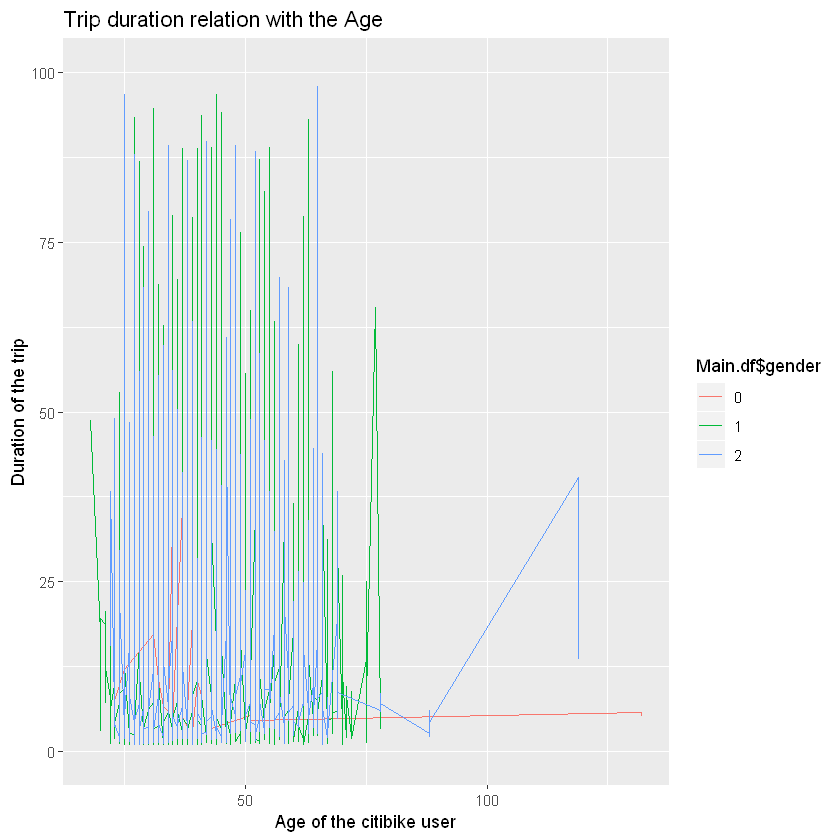

In [23]:
Main.df$gender = as.factor(Main.df$gender)
ggplot(data = Main.df, aes(x=Main.df$Age, y = Main.df$tripduration, color = Main.df$gender)) + geom_line() + ylim(0,100) + 
xlab("Age of the citibike user") + ylab("Duration of the trip") + ggtitle("Trip duration relation with the Age")

#### Insights from the above graph:
1) Gender 0 has the lowest trip duration through out all ages.

2) It is strange to see user with age above 100. Could be a input error or we have quite athletic old people in the city.

Warning message:
"Removed 203 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 203 rows containing missing values (geom_point)."

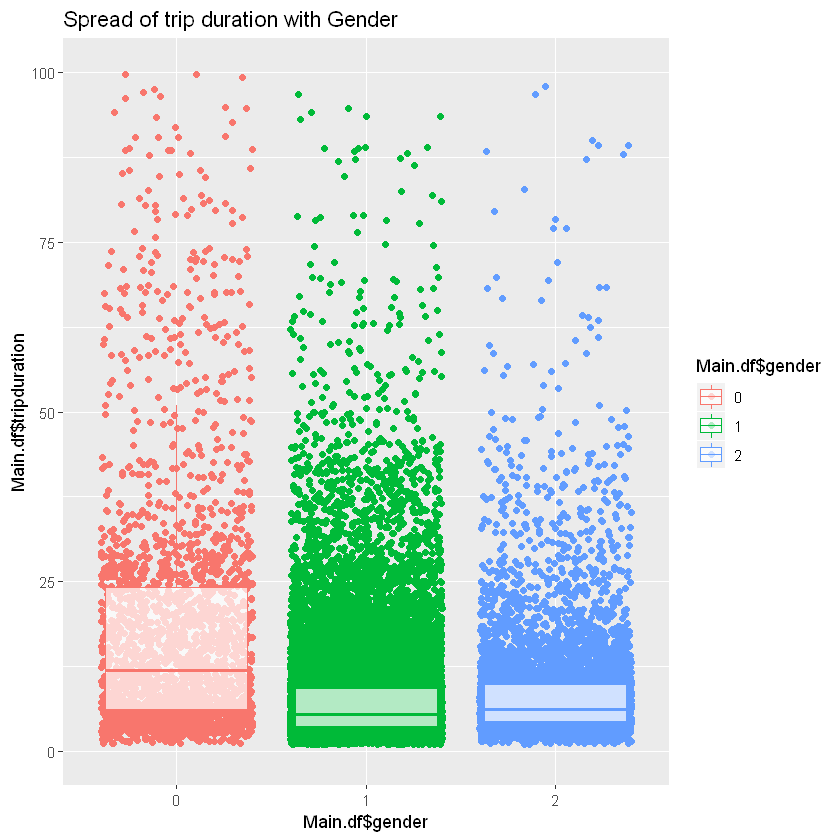

In [24]:
ggplot(data = Main.df, aes(x=Main.df$gender, y=Main.df$tripduration, color = Main.df$gender))  + 
geom_jitter() + 
geom_boxplot(alpha=0.7, outlier.colour = NA)+ ylim(0,100) +
ggtitle("Spread of trip duration with Gender")

#### From the above gender spread:
1) Gender 0 is has a wide spread which is visible from Q1 to Q3.

2) Gender 0 has the highest median which means people from gender 0 has high trip duration compared to other 2 genders.

3) Gender 1 and 2 has almost the same spread.

## Business Questions:
1. What is the total revenue assuming all users riding bikes from 0 to 45 minutes pay dollar 3 per ride and user exceeding 45 minutes pay an additional dollar 2 per ride.
2. Looking at tripduration in minutes, what can you say about the variance in the data.
3. What does this mean for the pricing strategy?
4. What does this mean for inventory availability?
##### Datasource: BusinessAnalytics/BAData/JC-201709-citibike-tripdata.csv

#### 1. What is the total revenue assuming all users riding bikes from 0 to 45 minutes pay dollar 3 per ride and user exceeding 45 minutes pay an additional dollar 2 per ride.

##### *Solution 1:*

In [25]:
for (a in 1:nrow(Main.df)){
    if (Main.df$tripduration[a]/45 < 1){
        Main.df$fare[a] = 3
    } else {
        Main.df$fare[a] = 3 + (trunc(Main.df$tripduration[a]/45 - 1)*2)
    }
}

####  Since we dont have clear information on how a user will be charged after they cross the intial 45 mins and then 2 dollar for what time. 
##### - We assumed that user will be charged 3 dollars for initial 45 mins and 2 dollars for every 45 mins it crosses after that.

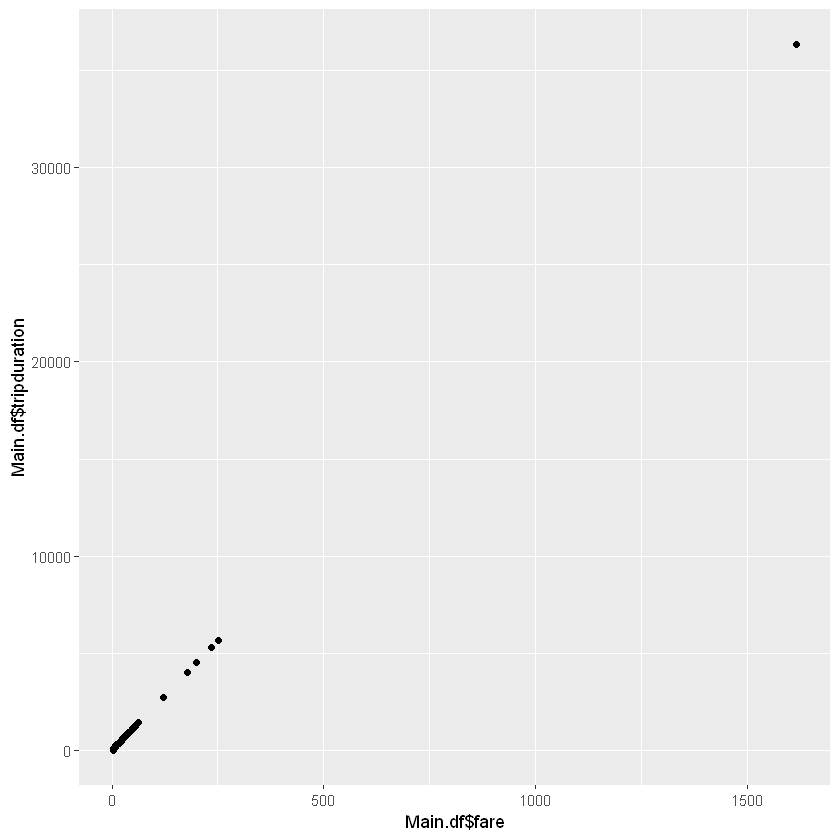

In [26]:
ggplot(data = Main.df, aes(x= Main.df$fare, y = Main.df$tripduration)) + geom_point()

#### From the above graph it looks like the for loop did a great job of allocating the fare.

In [27]:
summary(Main.df[,"fare"])
cat("The total revenue :", sum(Main.df$fare),"$")

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   3.000    3.000    3.000    3.146    3.000 1617.000 

The total revenue : 104203 $

#### from the above statistics it is quite clear from the 3rd Quartile and mean being 3 that most of the users are riding the bike between 0-45 mins

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

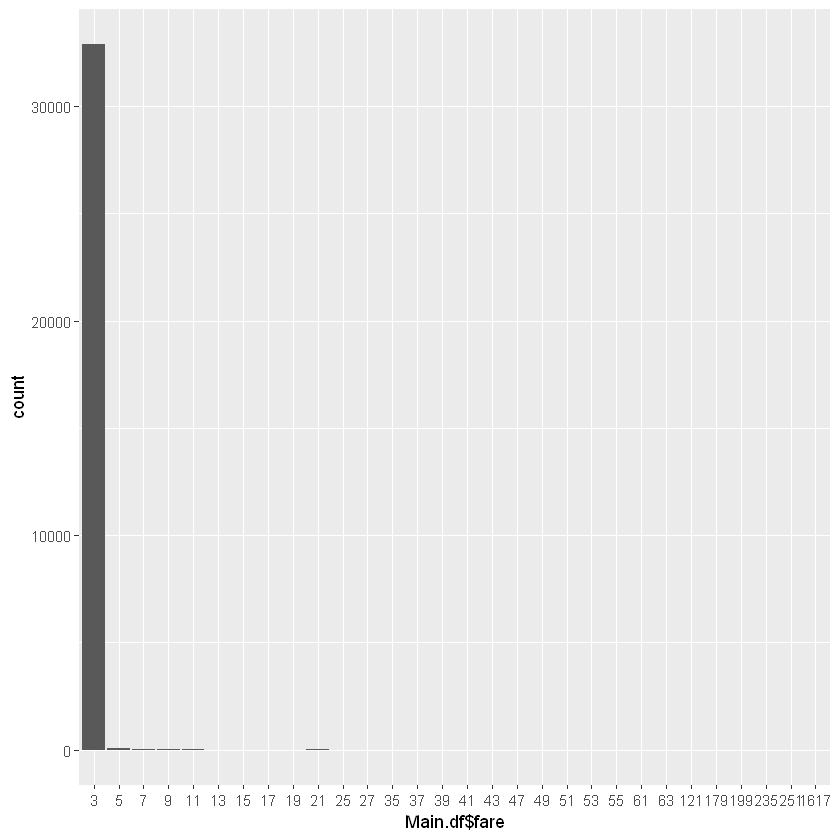

In [28]:
#ignoring the outliers 
Main.df$fare=as.factor(Main.df$fare)
ggplot(data = Main.df, aes(x= Main.df$fare)) + geom_histogram(binwidth = 10, stat = "count")

### Confirming the hypothesis of majority of customers being the ones who use the Bike for 0-45 mins.


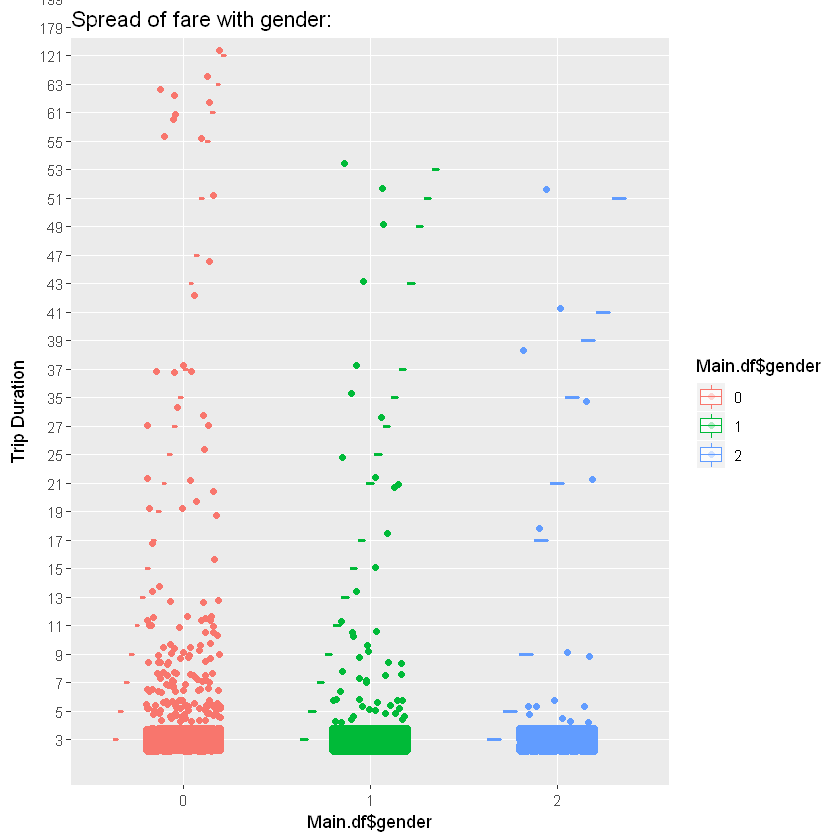

In [29]:

ggplot(data = Main.df, aes(x = Main.df$gender, y = Main.df$fare , color = Main.df$gender)) + 
 geom_jitter(shape=16, position=position_jitter(0.2))+
  geom_boxplot(alpha = 0.7) +
  coord_cartesian(ylim = c(0, 25))+
  ylab("Trip Duration")+
  ggtitle("Spread of fare with gender:")
 

### Proposed Business:
#### Looks like gender 0 and 1 have more users paying more than 3 dollars and we should focus on them. We can have special first few free rides and more offers for them that can give them incentive to use Citibike more and further increase the number of this gender using Citibike which would increase out revenue. It can also be looked the other way around if we want to work on getting more users with gender 2 to use citibike.


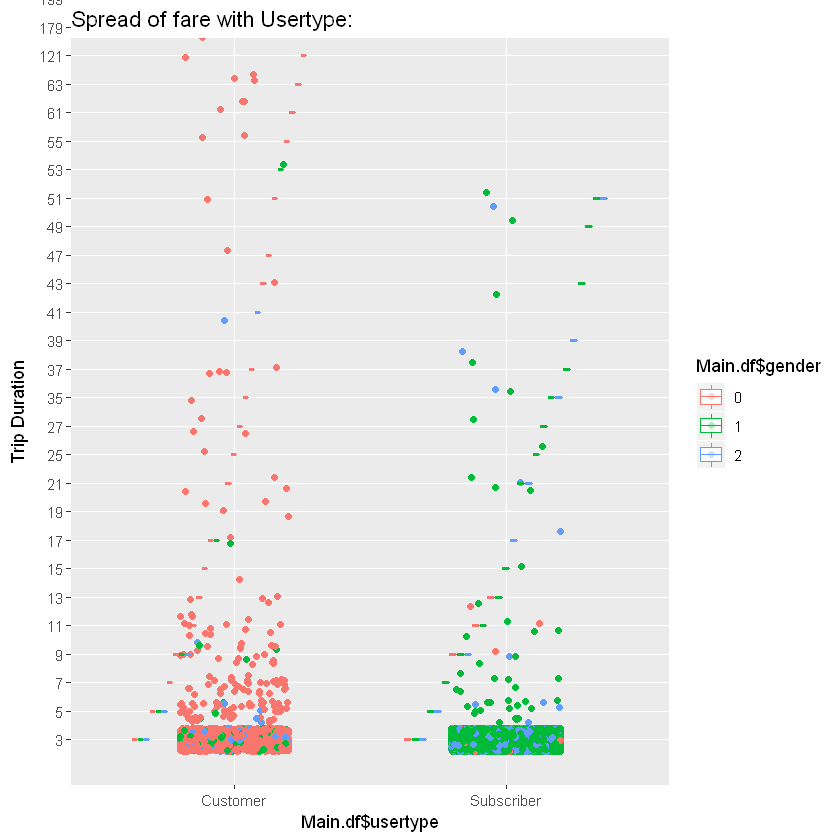

In [30]:

ggplot(data = Main.df, aes(x = Main.df$usertype, y = Main.df$fare , color = Main.df$gender)) + 
 geom_jitter(shape=16, position=position_jitter(0.2))+
  geom_boxplot(alpha = 0.7) +
  coord_cartesian(ylim = c(0, 25))+
  ylab("Trip Duration")+
  ggtitle("Spread of fare with Usertype:")
 

### From the above distribution; looks like most of our high spending gender is 0 and they are majorly Customers. We can have reward programs and discounts for the gender 2 to get them using citibike over first 45 mins to make more profit.  

In [31]:
head(Main.df)

tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender,Diff,Age,fare
6.066667,2017-09-01 00:02:00,2017-09-01 00:08:00,3183,Exchange Place,40.71625,-74.03346,3276,Marin Light Rail,40.71458,-74.04282,29670,Subscriber,1989,1,6 mins,30,3
5.950000,2017-09-01 00:08:00,2017-09-01 00:14:00,3187,Warren St,40.72112,-74.03805,3199,Newport Pkwy,40.72874,-74.03211,26163,Subscriber,1980,1,6 mins,39,3
7.200000,2017-09-01 00:10:00,2017-09-01 00:17:00,3195,Sip Ave,40.73074,-74.06378,3280,Astor Place,40.71928,-74.07126,26273,Subscriber,1988,1,7 mins,31,3
15.566667,2017-09-01 00:10:00,2017-09-01 00:25:00,3272,Jersey & 3rd,40.72333,-74.04595,3207,Oakland Ave,40.73760,-74.05248,26297,Subscriber,1991,1,15 mins,28,3
15.533333,2017-09-01 00:10:00,2017-09-01 00:25:00,3272,Jersey & 3rd,40.72333,-74.04595,3207,Oakland Ave,40.73760,-74.05248,29247,Subscriber,1993,2,15 mins,26,3
6.900000,2017-09-01 00:15:00,2017-09-01 00:22:00,3186,Grove St PATH,40.71959,-74.04312,3480,WS Don't Use,0.00000,0.00000,29589,Customer,NULL,0,7 mins,NA,3


In [32]:
class(Main.df$fare)

[1] "factor"

In [33]:
Main.df$fare = as.integer(Main.df$fare)
df_groupby_date.fare = aggregate(Main.df$fare, by = list(Main.df$starttime),FUN = sum)

In [34]:
head(df_groupby_date.fare)

Group.1,x
2017-09-01 00:02:00,1
2017-09-01 00:08:00,1
2017-09-01 00:10:00,3
2017-09-01 00:15:00,2
2017-09-01 00:36:00,1
2017-09-01 00:38:00,1


### the above grouped data by date gives sum of revenue by date 

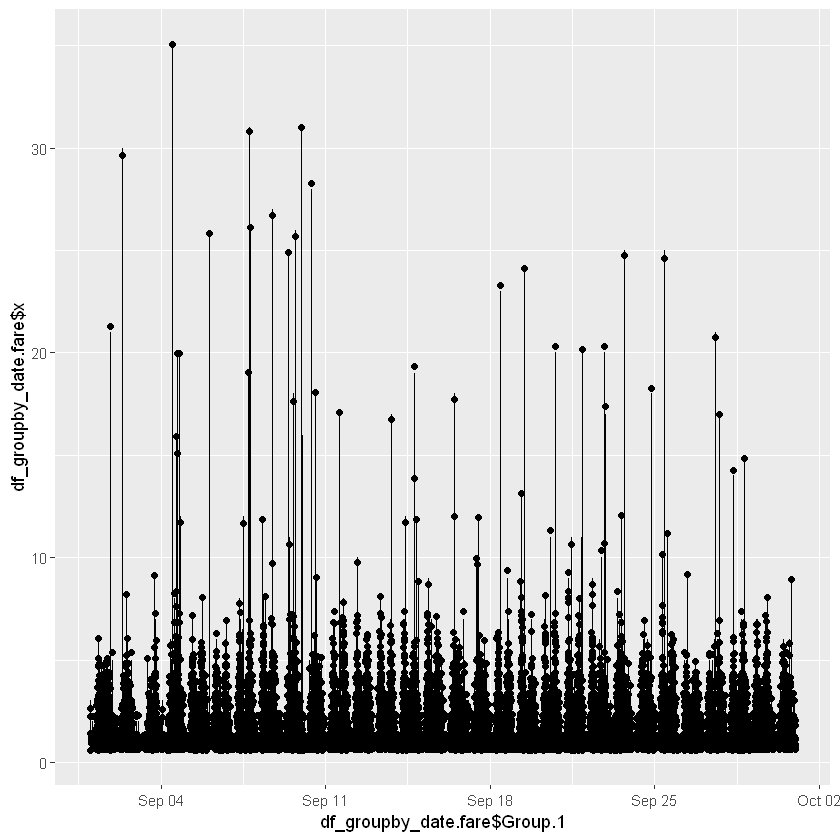

In [35]:
ggplot(data = df_groupby_date.fare , aes(x=df_groupby_date.fare$Group.1, y = df_groupby_date.fare$x)) + geom_line() +geom_jitter()

### Looks like there is no trend in customer spending and the day they used service to exploit in our favor.
#### Though  9 10 sep has high usage could be because they are weekends.

### 2. Looking at tripduration in minutes, what can you say about the variance in the data.

#### Solution:

In [36]:
cat ("The variance for the Tripduration is :",var(Main.df$tripduration))

The variance for the Tripduration is : 44300.24

A high variance indicates that the data points are very spread out from the mean, and from one another. The reason for this could be the outliers shifting the variance towards high.

#### Lets check variance without the outliers:

In [37]:
cat ("The variance for the Tripduration is :",var(Main.df$tripduration[Main.df$tripduration <100 ]),"\n")

cat("max trip duration is",max(Main.df$tripduration))


The variance for the Tripduration is : 92.54985 
max trip duration is 36360.47

Like suspected the variance drops drastically when taken the outlier out of the story. This means that our data points are wide spread and have big space between them. We have extremes in the dataset as well.

### 3. What does this mean for the pricing strategy?

#### Since the variance for the trip duration is high; which means that we have extreme values,  like people with duration very less and people with duration very High.
 *For pricing it would make more sense to increase the cost for short use of the citibike as most of our customer lies in short rides and very few in for long rides. We have to find a sweet spot in fare for short use such that we make more profit without losing our customerrs.*

In [38]:
cat("Revenue from short distance is:",sum(Main.df$fare[Main.df$fare < 25]),"\n")
cat("Revenue from long rides is:",sum(Main.df$fare[Main.df$fare > 25]))

Revenue from short distance is: 34108 
Revenue from long rides is: 140

#### From the above we can see that revenue generated by long ride user is much lower than the short ride user, so focus should be to magnify the below 25 dollars short ride users.

### 4. What does this mean for inventory availability?

In [39]:

install.packages("magrittr") # package installations are only needed the first time you use it
install.packages("dplyr")    # alternative installation of the %>%
library(magrittr) # needs to be run every time you start R and want to use %>%
library(dplyr)    # alternatively, this also loads %>%


#grouping by the start station to get the number of usage from that place 
df_recurring_Average = Main.df %>% group_by(start.station.id) %>% 
summarise(n = n(),total_revenue = sum(fare), Average = total_revenue/n) %>% 
filter(n > 1)

package 'magrittr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmpeODnrf\downloaded_packages
package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\Business Analytics\Lib\R\library\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\Business Analytics\Lib\R\library\dplyr\libs\x64\dplyr.dll: Permission denied"Warning message:
"restored 'dplyr'"


The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmpeODnrf\downloaded_packages



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

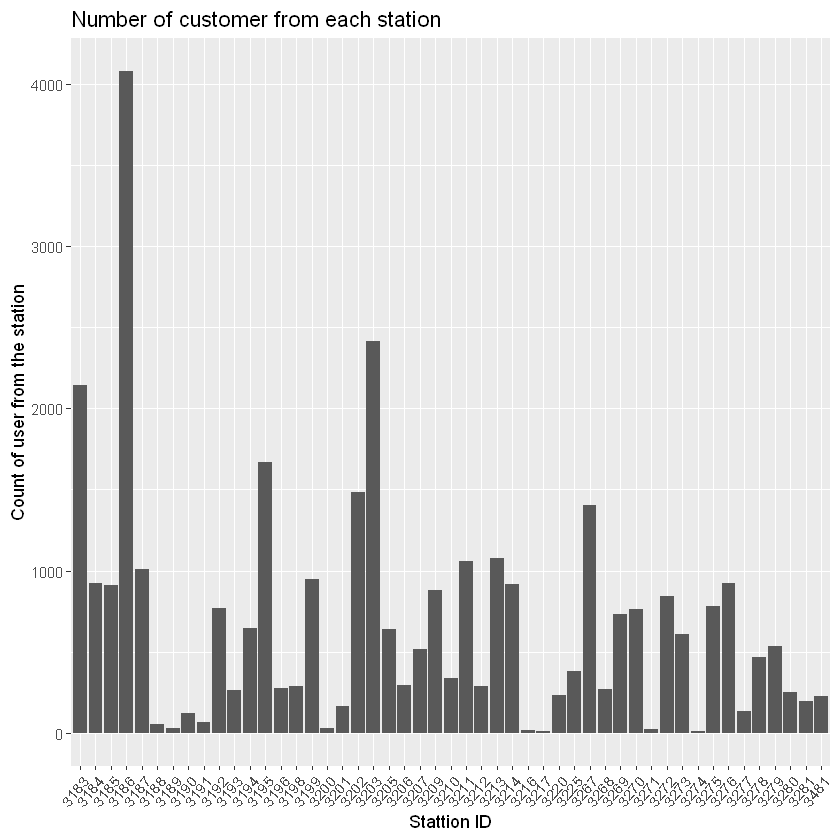

In [40]:
df_recurring_Average$start.station.id = as.factor(df_recurring_Average$start.station.id)
ggplot(data = df_recurring_Average, aes(y = df_recurring_Average$n, x= df_recurring_Average$start.station.id)) + 
   geom_histogram(stat = "identity")+
   xlab("Stattion ID")+
   ylab("Count of user from the station")+
   ggtitle("Number of customer from each station")+
   theme(axis.text.x = element_text(angle = 50, hjust = 1))

### From the above graph:
#### *we can see the station number with the maximum usage and Minimum usage, we can provide max usage stations with more bikes and facilities. while the station with less users can work with less bikes and resources which doesnt get used. This would help us use resources wisely and make us the most revenue.*

## PROBLEM 2: Zagat Descriptive Analytics
### *Complete an analysis of Zagat rating using the "zagat" dataset. For details on Zagat ratings go here: https://www.zagat.com/about-us*


### Analytics Questions:
1. What can you say about the central tendency of the ratings?
2. What can you say about the spread and dispersion of the ratings?
3. What are the correlations between rating dimensions?
4. Using the information in 1-3, design a weighted average (index) that computes scores for each restaurant. Your index needs to reflect which ratings (decor vs food vs service vs price) you wish to amplify with loads/weights



In [41]:
Main.df = read.csv("C:\\Users\\shrey\\OneDrive\\Desktop\\BUSINESS ANALYTICS\\zagat.csv")

In [42]:
head(Main.df)

Name,Food,Decor,Service,Price
107 West,16,13,16,26
2nd Street cafe,14,13,15,21
44 & Hell's kitchen,22,19,19,42
55 wall,21,22,21,54
55 wall street,21,22,21,54
92,15,15,15,43


### 1. What can you say about the central tendency of the ratings?

#### Solution:

In [43]:
summary(Main.df)

              Name          Food           Decor          Service    
 Ferrara        :  2   Min.   : 9.00   Min.   : 3.00   Min.   : 8.0  
 Oceana         :  2   1st Qu.:16.00   1st Qu.:13.00   1st Qu.:14.0  
 Orso           :  2   Median :19.00   Median :16.00   Median :16.0  
 Tsampa         :  2   Mean   :19.39   Mean   :15.72   Mean   :16.9  
 107 West       :  1   3rd Qu.:22.00   3rd Qu.:19.00   3rd Qu.:20.0  
 2nd Street cafe:  1   Max.   :28.00   Max.   :27.00   Max.   :26.0  
 (Other)        :290                                                 
     Price      
 Min.   : 8.00  
 1st Qu.:25.00  
 Median :35.00  
 Mean   :36.55  
 3rd Qu.:47.00  
 Max.   :80.00  
                

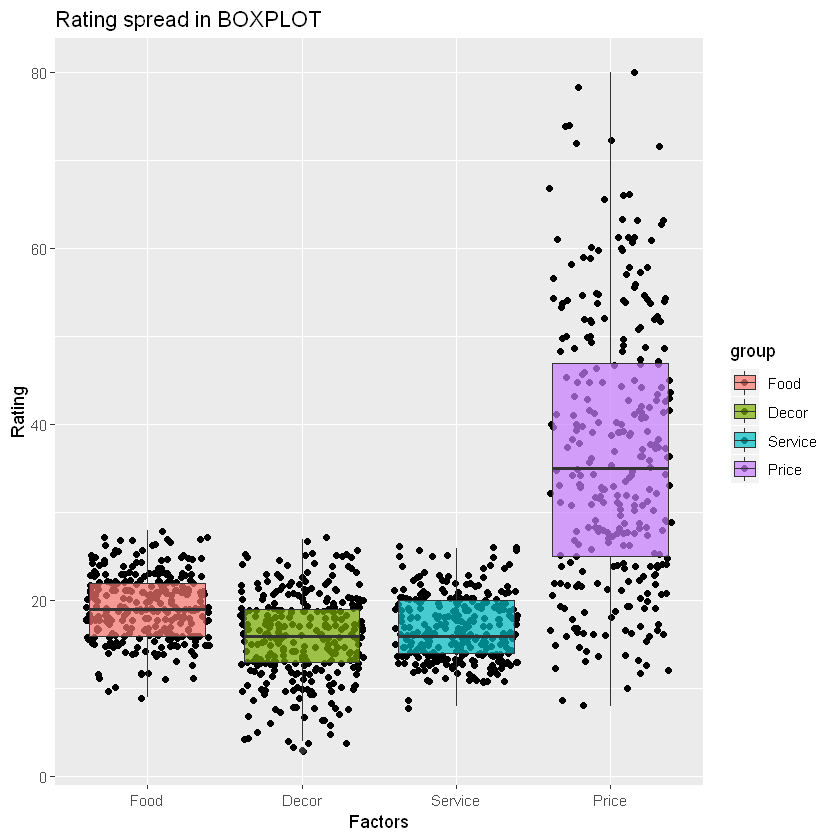

In [44]:
a = data.frame(group = "Food", value = Main.df$Food)
b = data.frame(group = "Decor", value = Main.df$Decor)
c = data.frame(group = "Service", value = Main.df$Service)
d = data.frame(group = "Price", value = Main.df$Price)

plot.data = rbind(a, b,c,d) # this function will bind or join the rows. See data at bottom.

ggplot(plot.data, aes(x=group, y=value, fill=group)) + 
    geom_jitter()+
  geom_boxplot(alpha=0.7)+
    ylab("Rating")+
    xlab("Factors")+
    ggtitle("Rating spread in BOXPLOT")

### The central tendency of the rating:
#### For Food:
1) Food rating is good because Mean is not much far from Min and Max when compared to other Ratings and their min and Max(Since we dont know if the rating for all are out of same range). This means that People agree to some extent about the food quality.

2) Price rating are the most wide spread ranging from min of 8 to max of 80 and Mean being almost in center. That means people have varing feeling on how they get charged.

3) Decor rating has a low max compared to other ratings ration of min to max. This means that there are some people who find decor terrible at some of these restaurants.





### 2. What can you say about the spread and dispersion of the ratings?

#### Solution:

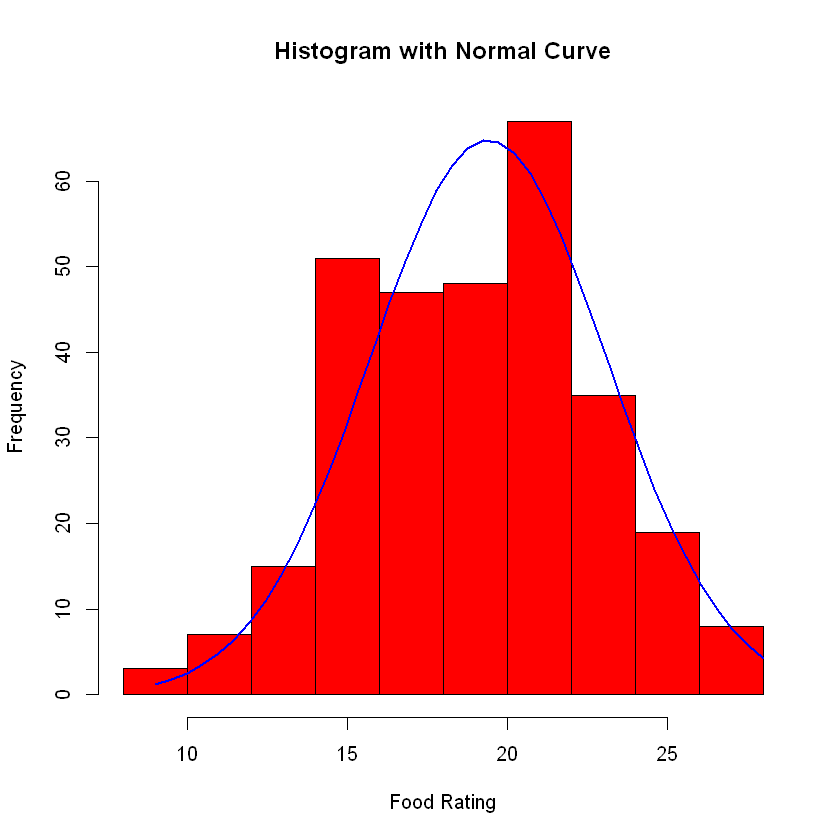

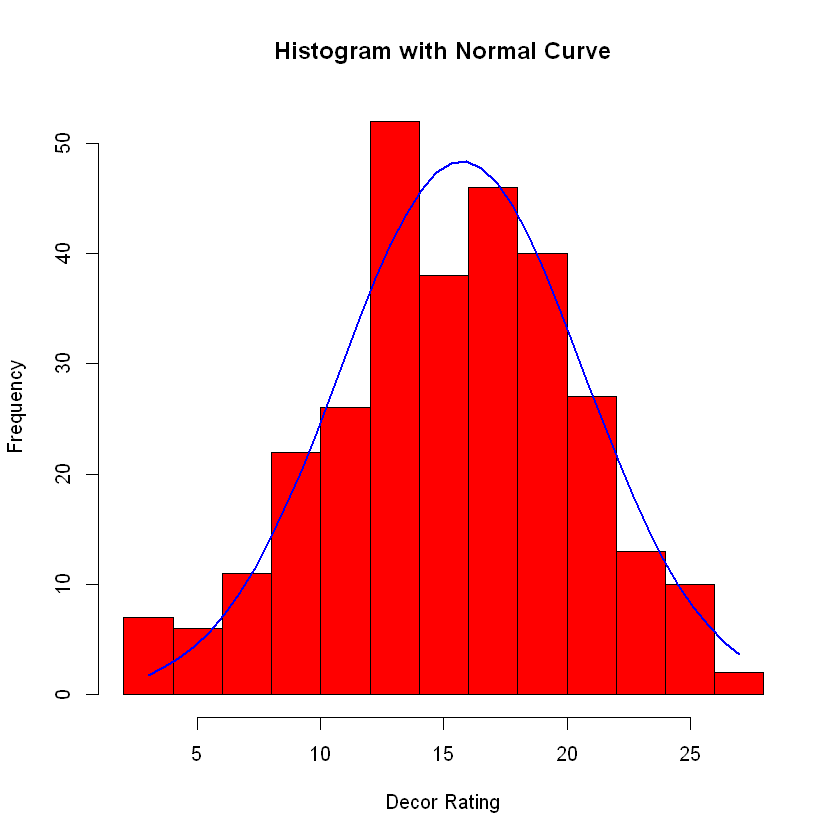

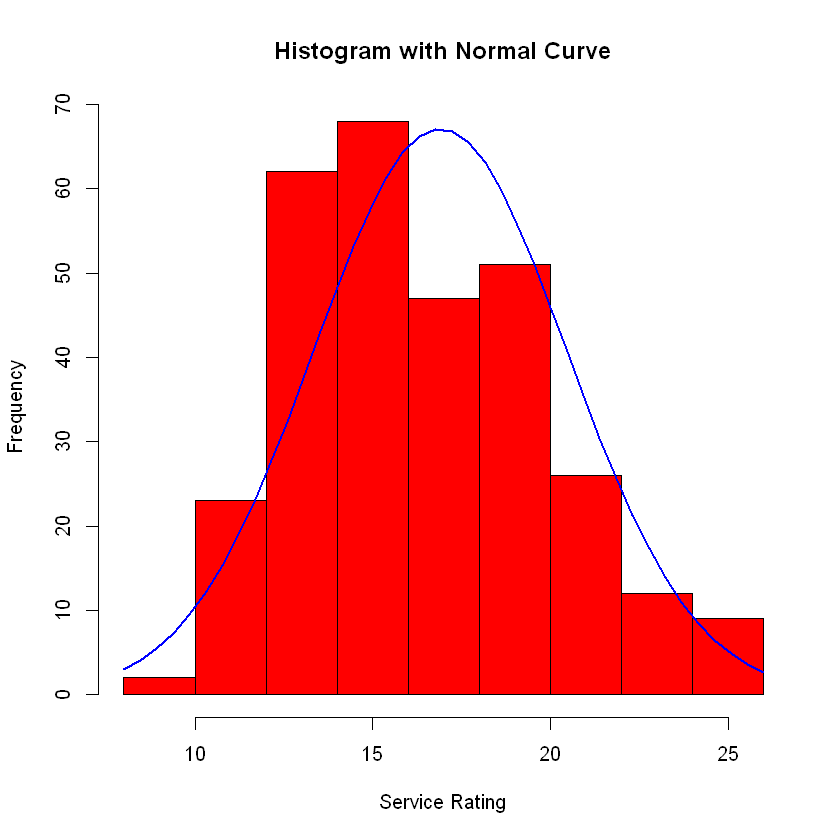

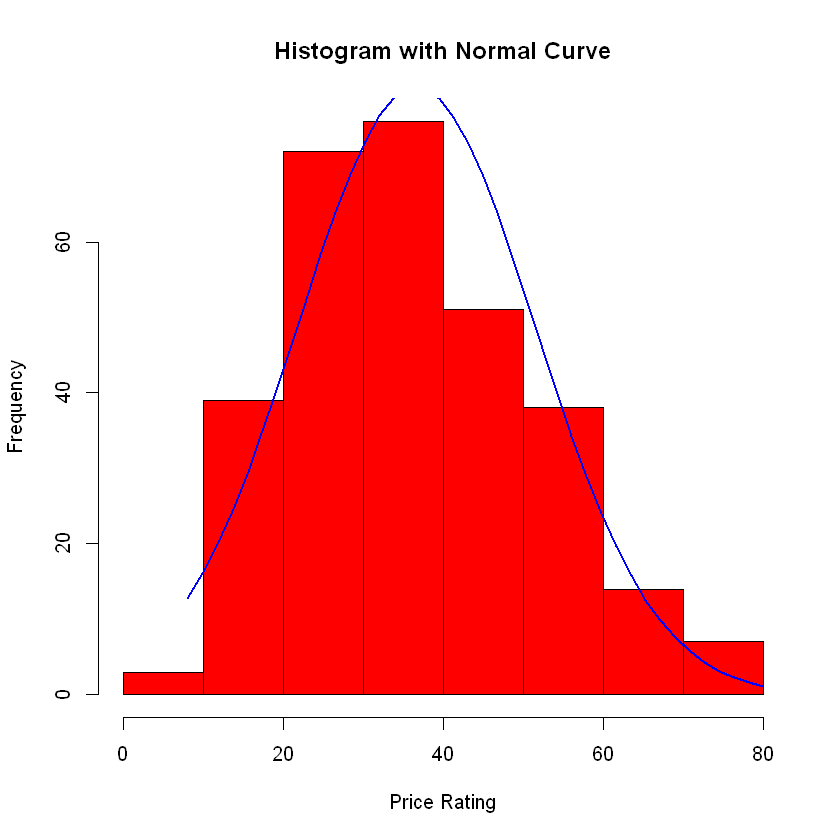

In [45]:
x= Main.df$Food
h<-hist(x, breaks=10, col="red", xlab="Food Rating",
   main="Histogram with Normal Curve")
xfit<-seq(min(x),max(x),length=40)
yfit<-dnorm(xfit,mean=mean(x),sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)

x= Main.df$Decor
h<-hist(x, breaks=10, col="red", xlab="Decor Rating",
   main="Histogram with Normal Curve")
xfit<-seq(min(x),max(x),length=40)
yfit<-dnorm(xfit,mean=mean(x),sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)

x= Main.df$Service
h<-hist(x, breaks=10, col="red", xlab="Service Rating",
   main="Histogram with Normal Curve")
xfit<-seq(min(x),max(x),length=40)
yfit<-dnorm(xfit,mean=mean(x),sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)

x= Main.df$Price
h<-hist(x, breaks=10, col="red", xlab="Price Rating",
   main="Histogram with Normal Curve")
xfit<-seq(min(x),max(x),length=40)
yfit<-dnorm(xfit,mean=mean(x),sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)



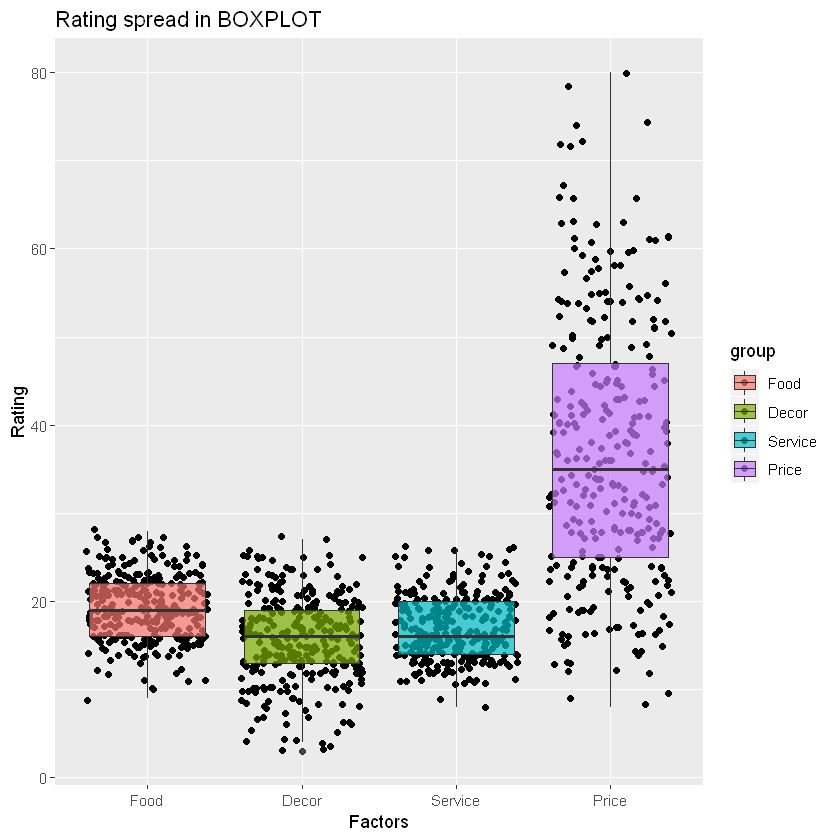

In [46]:
ggplot(plot.data, aes(x=group, y=value, fill=group)) + 
    geom_jitter()+
  geom_boxplot(alpha=0.7)+
    ylab("Rating")+
    xlab("Factors")+
    ggtitle("Rating spread in BOXPLOT")

### Above graph shows Spread of rating in each dimension.

1) we can see how Price has the most spread.

2) while other three are almost the same.

3) Decor and Services have almost same Mode but much different max and min.

### 3. What are the correlations between rating dimensions?

#### Solution:

In [47]:
install.packages("PerformanceAnalytics")
library("PerformanceAnalytics")


package 'PerformanceAnalytics' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmpeODnrf\downloaded_packages


Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Attaching package: 'xts'

The following objects are masked from 'package:dplyr':

    first, last


Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend



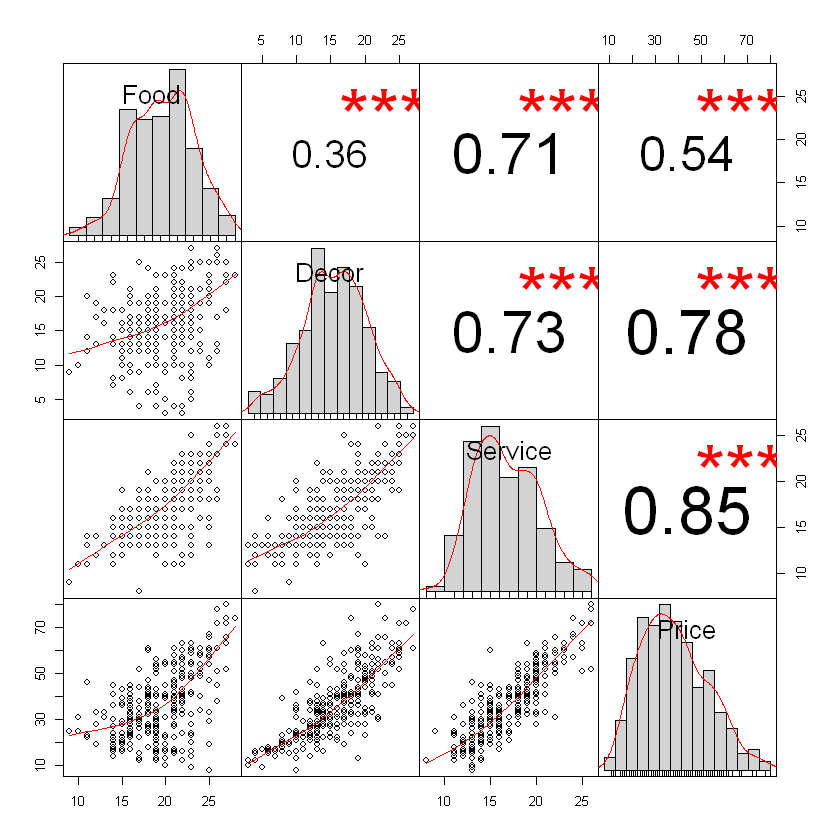

In [48]:
chart.Correlation(Main.df[,2:5], histogram=TRUE, pch=19)

- The distribution of each variable is shown on the diagonal.
- On the bottom of the diagonal : the bivariate scatter plots with a fitted line are displayed
- On the top of the diagonal : the value of the correlation plus the significance level as stars
- Each significance level is associated to a symbol : p-values(0, 0.001, 0.01, 0.05, 0.1, 1) <=> symbols(“***”, “**”, “*”, “.”, " “)

#### Insights from the correlation Graph:
1) Food and Decor has the lowest correlation(0.36)

2) Service and Price has the highest correlation(0.85)


### 4. Using the information in 1-3, design a weighted average (index) that computes scores for each restaurant. Your index needs to reflect which ratings (decor vs food vs service vs price) you wish to amplify with loads/weights.

#### Solution:

In [49]:
install.packages("BBmisc")
library(BBmisc)


package 'BBmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmpeODnrf\downloaded_packages



Attaching package: 'BBmisc'

The following objects are masked from 'package:dplyr':

    coalesce, collapse

The following object is masked from 'package:base':

    isFALSE



In [50]:
# This function "center" & "Scale" normalises the data set 
temp_norm = normalize(Main.df, method = "standardize", range = c(0, 1), margin = 4L, on.constant = "quiet")


In [51]:
head(temp_norm)
summary(temp_norm)

Name,Food,Decor,Service,Price
107 West,-0.9171278,-0.5501763,-0.2513958,-0.7091696
2nd Street cafe,-1.4587388,-0.5501763,-0.5317628,-1.0452689
44 & Hell's kitchen,0.7077050,0.6619624,0.5897053,0.3663483
55 wall,0.4368995,1.2680317,1.1504394,1.1729867
55 wall street,0.4368995,1.2680317,1.1504394,1.1729867
92,-1.1879333,-0.1461300,-0.5317628,0.4335681


              Name          Food             Decor             Service       
 Ferrara        :  2   Min.   :-2.8128   Min.   :-2.57041   Min.   :-2.4943  
 Oceana         :  2   1st Qu.:-0.9171   1st Qu.:-0.55018   1st Qu.:-0.8121  
 Orso           :  2   Median :-0.1047   Median : 0.05589   Median :-0.2514  
 Tsampa         :  2   Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000  
 107 West       :  1   3rd Qu.: 0.7077   3rd Qu.: 0.66196   3rd Qu.: 0.8701  
 2nd Street cafe:  1   Max.   : 2.3325   Max.   : 2.27815   Max.   : 2.5523  
 (Other)        :290                                                         
     Price        
 Min.   :-1.9191  
 1st Qu.:-0.7764  
 Median :-0.1042  
 Mean   : 0.0000  
 3rd Qu.: 0.7024  
 Max.   : 2.9207  
                  

In [52]:
cat("range for food is :", max(temp_norm$Food)-min(temp_norm$Food),"\n")

cat("range for decor is :", max(temp_norm$Decor)-min(temp_norm$Decor),"\n")

cat("range for service is :", max(temp_norm$Service)-min(temp_norm$Service),"\n")

cat("range for Price is :", max(temp_norm$Price)-min(temp_norm$Price),"\n")

range for food is : 5.145304 
range for decor is : 4.848555 
range for service is : 5.046607 
range for Price is : 4.83983 


## From the summary of the normalized data lets decide the weights for the attributes:
- Food and service will get low weight Because their range is quite big compared to other 2 which tells how customers have varying opinion on this. 
- Decor will get high weights since their range is less which tells how customers have somewhat similar taste for them.

Food and Service weight = 3

Price and decor weights = 5


In [53]:
#final score using weights
for (a in 1:nrow(temp_norm)){
    temp_norm$Final.score[a] = temp_norm$Food[a]*3 + temp_norm$Service[a]*3 + temp_norm$Decor[a]*5 + temp_norm$Price[a]*5
}

In [54]:
head(temp_norm)

Name,Food,Decor,Service,Price,Final.score
107 West,-0.9171278,-0.5501763,-0.2513958,-0.7091696,-9.802300
2nd Street cafe,-1.4587388,-0.5501763,-0.5317628,-1.0452689,-13.948731
44 & Hell's kitchen,0.7077050,0.6619624,0.5897053,0.3663483,9.033784
55 wall,0.4368995,1.2680317,1.1504394,1.1729867,16.967109
55 wall street,0.4368995,1.2680317,1.1504394,1.1729867,16.967109
92,-1.1879333,-0.1461300,-0.5317628,0.4335681,-3.721898


### Above is a final.score between 1 to 10 for better understanding:
*This tells us which restaurat is doing well overall giving more importance to Food and services*

In [55]:
install.packages("scales")
library(scales)


package 'scales' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'scales'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\Business Analytics\Lib\R\library\00LOCK\scales\libs\x64\scales.dll to C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\Business Analytics\Lib\R\library\scales\libs\x64\scales.dll: Permission denied"Warning message:
"restored 'scales'"


The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmpeODnrf\downloaded_packages


In [56]:
temp_norm$OutOf10 = rescale(temp_norm$Final.score, to = c(1,10))

In [57]:
head(temp_norm)

Name,Food,Decor,Service,Price,Final.score,OutOf10
107 West,-0.9171278,-0.5501763,-0.2513958,-0.7091696,-9.802300,3.614172
2nd Street cafe,-1.4587388,-0.5501763,-0.5317628,-1.0452689,-13.948731,3.064302
44 & Hell's kitchen,0.7077050,0.6619624,0.5897053,0.3663483,9.033784,6.112076
55 wall,0.4368995,1.2680317,1.1504394,1.1729867,16.967109,7.164136
55 wall street,0.4368995,1.2680317,1.1504394,1.1729867,16.967109,7.164136
92,-1.1879333,-0.1461300,-0.5317628,0.4335681,-3.721898,4.420510


### Business Questions: 
#### 1. What makes a business more profitable?  
#### 2. If you were hired to advise a new restaurant operator, what would you  recommend in terms of the balance & trade-offs  between food, decor, service, and  price? 

### 1. What makes a business more profitable?  

#### Solution:

### This question has many approaches:
#### Scaling or Improving the quality. In scaling we get more customers with less profit on each dish but revenue increases with increease in customer base. In Improving the services like Food, Decor, Service we have the power to charge customer more and therre by increase our revenue.

- We can make more profit my understanding how much the customer is willing to pay and keep the rates accordingly.
- We can invest in services like decor or good customer service convincing the customer to come back again spreading customer loyalty.
- Last way is to keep everything the way it is with working on cost of making each dish. Id cost reduces we make the profit without changing price or our services.

 ### 2. If you were hired to advise a new restaurant operator, what would you  recommend in terms of the balance & trade-offs  between food, decor, service, and  price? 
 
 #### Solution:

 *I would recommend improving on Service and Decor has they are highly correlated to Price. Having a good Service and Decor would allow us to increase the rate for each dish and there by making us more profit, we have account for the increase in cost that comes with improving the Service and Decor but it has to make us a positive and higher return*